# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

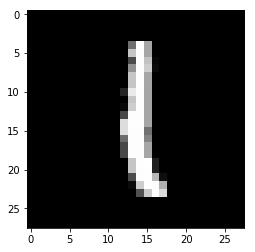

In [26]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [45]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1] 
# Input and target placeholders
inputs_ = tf.placeholder('float', [None,image_size])
targets_ = tf.placeholder('float', [None,image_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits )
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

# Size of the encoding layer (the hidden layer)
encoding_dim = 32

## Training

In [46]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [47]:
epochs = 5
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/5... Training loss: 0.6939
Epoch: 1/5... Training loss: 0.6899
Epoch: 1/5... Training loss: 0.6857
Epoch: 1/5... Training loss: 0.6811
Epoch: 1/5... Training loss: 0.6753
Epoch: 1/5... Training loss: 0.6692
Epoch: 1/5... Training loss: 0.6613
Epoch: 1/5... Training loss: 0.6521
Epoch: 1/5... Training loss: 0.6419
Epoch: 1/5... Training loss: 0.6303
Epoch: 1/5... Training loss: 0.6176
Epoch: 1/5... Training loss: 0.6030
Epoch: 1/5... Training loss: 0.5848
Epoch: 1/5... Training loss: 0.5716
Epoch: 1/5... Training loss: 0.5546
Epoch: 1/5... Training loss: 0.5375
Epoch: 1/5... Training loss: 0.5193
Epoch: 1/5... Training loss: 0.5008
Epoch: 1/5... Training loss: 0.4820
Epoch: 1/5... Training loss: 0.4656
Epoch: 1/5... Training loss: 0.4502
Epoch: 1/5... Training loss: 0.4294
Epoch: 1/5... Training loss: 0.4229
Epoch: 1/5... Training loss: 0.4139
Epoch: 1/5... Training loss: 0.3881
Epoch: 1/5... Training loss: 0.3744
Epoch: 1/5... Training loss: 0.3624
Epoch: 1/5... Training loss:

Epoch: 1/5... Training loss: 0.1851
Epoch: 1/5... Training loss: 0.1969
Epoch: 1/5... Training loss: 0.1870
Epoch: 1/5... Training loss: 0.1938
Epoch: 1/5... Training loss: 0.1905
Epoch: 1/5... Training loss: 0.1900
Epoch: 1/5... Training loss: 0.1916
Epoch: 1/5... Training loss: 0.1902
Epoch: 1/5... Training loss: 0.1925
Epoch: 1/5... Training loss: 0.1855
Epoch: 1/5... Training loss: 0.1903
Epoch: 1/5... Training loss: 0.1866
Epoch: 1/5... Training loss: 0.1887
Epoch: 1/5... Training loss: 0.1868
Epoch: 1/5... Training loss: 0.1921
Epoch: 1/5... Training loss: 0.1874
Epoch: 1/5... Training loss: 0.1852
Epoch: 1/5... Training loss: 0.1825
Epoch: 1/5... Training loss: 0.1861
Epoch: 1/5... Training loss: 0.1855
Epoch: 1/5... Training loss: 0.1904
Epoch: 1/5... Training loss: 0.1891
Epoch: 1/5... Training loss: 0.1798
Epoch: 1/5... Training loss: 0.1860
Epoch: 1/5... Training loss: 0.1863
Epoch: 1/5... Training loss: 0.1900
Epoch: 1/5... Training loss: 0.1861
Epoch: 1/5... Training loss:

Epoch: 2/5... Training loss: 0.1547
Epoch: 2/5... Training loss: 0.1533
Epoch: 2/5... Training loss: 0.1567
Epoch: 2/5... Training loss: 0.1528
Epoch: 2/5... Training loss: 0.1556
Epoch: 2/5... Training loss: 0.1570
Epoch: 2/5... Training loss: 0.1586
Epoch: 2/5... Training loss: 0.1574
Epoch: 2/5... Training loss: 0.1570
Epoch: 2/5... Training loss: 0.1536
Epoch: 2/5... Training loss: 0.1542
Epoch: 2/5... Training loss: 0.1617
Epoch: 2/5... Training loss: 0.1555
Epoch: 2/5... Training loss: 0.1545
Epoch: 2/5... Training loss: 0.1499
Epoch: 2/5... Training loss: 0.1526
Epoch: 2/5... Training loss: 0.1497
Epoch: 2/5... Training loss: 0.1540
Epoch: 2/5... Training loss: 0.1517
Epoch: 2/5... Training loss: 0.1499
Epoch: 2/5... Training loss: 0.1536
Epoch: 2/5... Training loss: 0.1467
Epoch: 2/5... Training loss: 0.1532
Epoch: 2/5... Training loss: 0.1526
Epoch: 2/5... Training loss: 0.1522
Epoch: 2/5... Training loss: 0.1489
Epoch: 2/5... Training loss: 0.1623
Epoch: 2/5... Training loss:

Epoch: 3/5... Training loss: 0.1393
Epoch: 3/5... Training loss: 0.1349
Epoch: 3/5... Training loss: 0.1351
Epoch: 3/5... Training loss: 0.1380
Epoch: 3/5... Training loss: 0.1371
Epoch: 3/5... Training loss: 0.1383
Epoch: 3/5... Training loss: 0.1324
Epoch: 3/5... Training loss: 0.1371
Epoch: 3/5... Training loss: 0.1401
Epoch: 3/5... Training loss: 0.1303
Epoch: 3/5... Training loss: 0.1307
Epoch: 3/5... Training loss: 0.1342
Epoch: 3/5... Training loss: 0.1407
Epoch: 3/5... Training loss: 0.1341
Epoch: 3/5... Training loss: 0.1374
Epoch: 3/5... Training loss: 0.1312
Epoch: 3/5... Training loss: 0.1372
Epoch: 3/5... Training loss: 0.1292
Epoch: 3/5... Training loss: 0.1325
Epoch: 3/5... Training loss: 0.1363
Epoch: 3/5... Training loss: 0.1327
Epoch: 3/5... Training loss: 0.1328
Epoch: 3/5... Training loss: 0.1434
Epoch: 3/5... Training loss: 0.1400
Epoch: 3/5... Training loss: 0.1360
Epoch: 3/5... Training loss: 0.1366
Epoch: 3/5... Training loss: 0.1377
Epoch: 3/5... Training loss:

Epoch: 4/5... Training loss: 0.1189
Epoch: 4/5... Training loss: 0.1234
Epoch: 4/5... Training loss: 0.1209
Epoch: 4/5... Training loss: 0.1240
Epoch: 4/5... Training loss: 0.1234
Epoch: 4/5... Training loss: 0.1247
Epoch: 4/5... Training loss: 0.1207
Epoch: 4/5... Training loss: 0.1230
Epoch: 4/5... Training loss: 0.1237
Epoch: 4/5... Training loss: 0.1198
Epoch: 4/5... Training loss: 0.1200
Epoch: 4/5... Training loss: 0.1265
Epoch: 4/5... Training loss: 0.1283
Epoch: 4/5... Training loss: 0.1177
Epoch: 4/5... Training loss: 0.1200
Epoch: 4/5... Training loss: 0.1250
Epoch: 4/5... Training loss: 0.1181
Epoch: 4/5... Training loss: 0.1179
Epoch: 4/5... Training loss: 0.1202
Epoch: 4/5... Training loss: 0.1258
Epoch: 4/5... Training loss: 0.1209
Epoch: 4/5... Training loss: 0.1181
Epoch: 4/5... Training loss: 0.1172
Epoch: 4/5... Training loss: 0.1214
Epoch: 4/5... Training loss: 0.1215
Epoch: 4/5... Training loss: 0.1244
Epoch: 4/5... Training loss: 0.1236
Epoch: 4/5... Training loss:

Epoch: 4/5... Training loss: 0.1217
Epoch: 4/5... Training loss: 0.1148
Epoch: 4/5... Training loss: 0.1145
Epoch: 4/5... Training loss: 0.1177
Epoch: 4/5... Training loss: 0.1115
Epoch: 4/5... Training loss: 0.1191
Epoch: 4/5... Training loss: 0.1108
Epoch: 4/5... Training loss: 0.1135
Epoch: 4/5... Training loss: 0.1163
Epoch: 4/5... Training loss: 0.1124
Epoch: 4/5... Training loss: 0.1148
Epoch: 4/5... Training loss: 0.1165
Epoch: 4/5... Training loss: 0.1147
Epoch: 4/5... Training loss: 0.1166
Epoch: 4/5... Training loss: 0.1175
Epoch: 4/5... Training loss: 0.1133
Epoch: 4/5... Training loss: 0.1140
Epoch: 4/5... Training loss: 0.1115
Epoch: 4/5... Training loss: 0.1112
Epoch: 4/5... Training loss: 0.1165
Epoch: 4/5... Training loss: 0.1170
Epoch: 4/5... Training loss: 0.1176
Epoch: 4/5... Training loss: 0.1150
Epoch: 4/5... Training loss: 0.1203
Epoch: 4/5... Training loss: 0.1143
Epoch: 4/5... Training loss: 0.1180
Epoch: 4/5... Training loss: 0.1124
Epoch: 5/5... Training loss:

Epoch: 5/5... Training loss: 0.1090
Epoch: 5/5... Training loss: 0.1092
Epoch: 5/5... Training loss: 0.1086
Epoch: 5/5... Training loss: 0.1070
Epoch: 5/5... Training loss: 0.1086
Epoch: 5/5... Training loss: 0.1085
Epoch: 5/5... Training loss: 0.1093
Epoch: 5/5... Training loss: 0.1125
Epoch: 5/5... Training loss: 0.1100
Epoch: 5/5... Training loss: 0.1121
Epoch: 5/5... Training loss: 0.1098
Epoch: 5/5... Training loss: 0.1131
Epoch: 5/5... Training loss: 0.1098
Epoch: 5/5... Training loss: 0.1101
Epoch: 5/5... Training loss: 0.1103
Epoch: 5/5... Training loss: 0.1082
Epoch: 5/5... Training loss: 0.1102
Epoch: 5/5... Training loss: 0.1071
Epoch: 5/5... Training loss: 0.1062
Epoch: 5/5... Training loss: 0.1100
Epoch: 5/5... Training loss: 0.1110
Epoch: 5/5... Training loss: 0.1071
Epoch: 5/5... Training loss: 0.1099
Epoch: 5/5... Training loss: 0.1066
Epoch: 5/5... Training loss: 0.1069
Epoch: 5/5... Training loss: 0.1086
Epoch: 5/5... Training loss: 0.1058
Epoch: 5/5... Training loss:

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

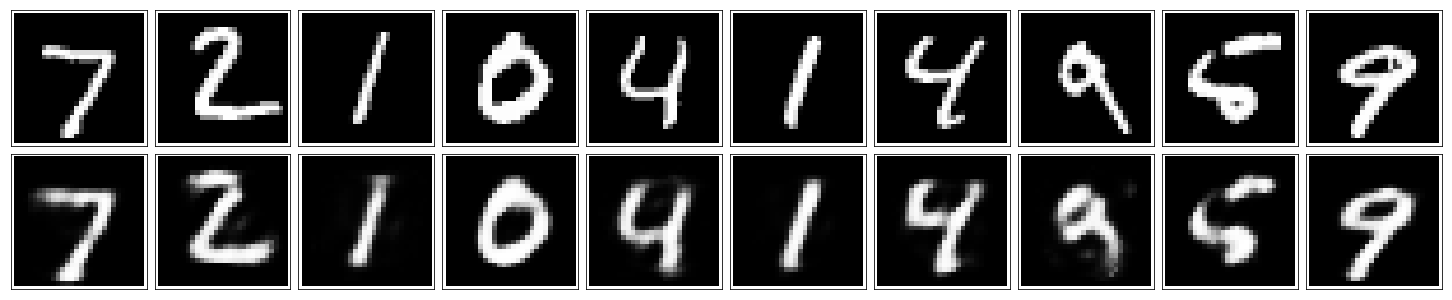

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [49]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.